# Pre-processing on another version of the original dataset with a different way of sampling

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
pd.set_option('display.max_columns', None)

### New dataset

In [82]:
df1 = pd.read_csv(r'dataset\LCMMbased_new_classes_tab.txt', delimiter = " ", header=None)

df1[['RID','Slope','TwoClass','ThreeClass','conversion','diagbl','ATN','Prob1','Prob2','Prob3']] = df1.iloc[:,0].str.split('\t', 9, expand=True)
df1 = df1.iloc[1:,1:]
df1.drop(['Slope','conversion','diagbl','ATN','Prob1','Prob2','Prob3'],axis=1,inplace=True)
df1['RID']=df1['RID'].astype(int)
df1['TwoClass']=(df1['TwoClass'].astype(int))-1
df1['ThreeClass']=(df1['ThreeClass'].astype(int))-1
print(df1.head())
print(df1.describe())

   RID  TwoClass  ThreeClass
1    2         0           0
2    4         0           1
3    5         0           0
4    8         0           0
5   14         0           0
               RID    TwoClass  ThreeClass
count   639.000000  639.000000  639.000000
mean   2045.303599    0.206573    0.582160
std    1800.138837    0.405163    0.709802
min       2.000000    0.000000    0.000000
25%     529.500000    0.000000    0.000000
50%    1212.000000    0.000000    0.000000
75%    4262.500000    0.000000    1.000000
max    5283.000000    1.000000    2.000000


### merge old plus new dataset values

In [83]:
df2 = pd.read_csv("dataset\CSF_Proteomics_ADNI.csv")
df2.drop(['binary_class','DX.bl','three_class','X','ORIGPROT','VISCODE'],axis=1,inplace=True)
df = pd.merge(df1, df2, on="RID")
df.drop(['RID'],axis=1,inplace=True)
print(df.shape)
print(df.head())

(68, 322)
   TwoClass  ThreeClass  A1AT.AVLTIDEK  A1AT.LSITGTYDLK  A1AT.SVLGQLGITK  \
0         0           1      10.949712         7.708165         9.573963   
1         1           1      10.764089         8.144418         9.561409   
2         1           2      10.197844         7.629740         9.583185   
3         0           1       9.337831         7.954020         9.385913   
4         1           2      10.045461         6.943874         9.916790   

   A1BG.NGVAQEPVHLDSPAIK  A1BG.SGLSTGWTQLSK  A2GL.DLLLPQPDLR  A2GL.VAAGAFQGLR  \
0              14.975933          19.567221        25.348033        22.576139   
1              15.415546          20.143607        25.650222        22.693205   
2              16.132868          20.854108        26.251222        23.343968   
3              15.483421          20.275207        25.121836        22.252958   
4              14.956206          19.659417        25.674894        22.778800   

   A4.LVFFAEDVGSNK  A4.THPHFVIPYR  A4.WYFDVTEG

### Note that we were given 68 records from the 135 of the beginning

## Explore our dataset

In [84]:
#differentiate other categorical features from the numerical ones
data = df.loc[:,'A1AT.AVLTIDEK':'VTDB.VPTADLEDVLPLAEDITNILSK']

#check head of numerical sub-dataset
data.head()

,A1AT.AVLTIDEK,A1AT.LSITGTYDLK,A1AT.SVLGQLGITK,A1BG.NGVAQEPVHLDSPAIK,A1BG.SGLSTGWTQLSK,A2GL.DLLLPQPDLR,A2GL.VAAGAFQGLR,A4.LVFFAEDVGSNK,A4.THPHFVIPYR,A4.WYFDVTEGK,AACT.ADLSGITGAR,AACT.EIGELYLPK,AACT.NLAVSQVVHK,AATC.IVASTLSNPELFEEWTGNVK,AATC.LALGDDSPALK,AATC.NLDYVATSIHEAVTK,AATM.FVTVQTISGTGALR,AFAM.DADPDTFFAK,AFAM.FLVNLVK,AFAM.LPNNVLQEK,ALDOA.ALQASALK,ALDOA.QLLLTADDR,AMBP.AFIQLWAFDAVK,AMBP.ETLLQDFR,AMBP.FLYHK,AMD.IPVDEEAFVIDFKPR,AMD.IVQFSPSGK,AMD.NGQWTLIGR,APLP2.HYQHVLAVDPEK,APLP2.WYFDLSK,APOB.IAELSATAQEIIK,APOB.SVSLPSLDPASAK,APOB.TGISPLALIK,APOD.VLNQELR,APOE.AATVGSLAGQPLQER,APOE.CLAVYQAGAR,APOE.LAVYQAGAR,APOE.LGADMEDVR,APOE.LGPLVEQGR,B2MG.VEHSDLSFSK,B2MG.VNHVTLSQPK,B3GN1.EPGEFALLR,B3GN1.TALASGGVLDASGDYR,B3GN1.YEAAVPDPR,BACE1.SIVDSGTTNLR,BASP1.ETPAATEAPSSTPK,BTD.LSSGLVTAALYGR,BTD.SHLIIAQVAK,C1QB.LEQGENVFLQATDK,C1QB.VPGLYYFTYHASSR,CA2D1.FVVTDGGITR,CA2D1.IKPVFIEDANFGR,CA2D1.TASGVNQLVDIYEK,CAD13.DIQGSLQDIFK,CAD13.INENTGSVSVTR,CAD13.YEVSSPYFK,CADM3.EGSVPPLK,CADM3.GNPVPQQYLWEK,CADM3.SLVTVLGIPQKPIITGYK,CAH1.VLDALQAIK,CAH1.YSSLAEAASK,CATA.LFAYPDTHR,CATD.LVDQNIFSFYLSR,CATD.VSTLPAITLK,CATD.YSQAVPAVTEGPIPEVLK,CATL1.VFQEPLFYEAPR,CCKN.AHLGALLAR,CCKN.NLQNLDPSHR,CD14.AFPALTSLDLSDNPGLGER,CD14.FPAIQNLALR,CD14.SWLAELQQWLKPGLK,CD59.AGLQVYNK,CERU.IYHSHIDAPK,CERU.NNEGTYYSPNYNPQSR,CFAB.DAQYAPGYDK,CFAB.VSEADSSNADWVTK,CFAB.YGLVTYATYPK,CH3L1.ILGQQVPYATK,CH3L1.SFTLASSETGVGAPISGPGIPGR,CH3L1.VTIDSSYDIAK,CLUS.IDSLLENDR,CLUS.SGSGLVGR,CLUS.VTTVASHTSDSDVPSGVTEVVVK,CMGA.EDSLEAGLPLQVR,CMGA.SEALAVDGAGKPGAEEAQDPEGK,CMGA.SGEATDGARPQALPEPMQESK,CMGA.SGELEQEEER,CMGA.YPGPQAEGDSEGLSQGLVDR,CNDP1.ALEQDLPVNIK,CNDP1.VFQYIDLHQDEFVQTLK,CNDP1.WNYIEGTK,CNTN1.DGEYVVEVR,CNTN1.TTKPYPADIVVQFK,CNTN2.IIVQAQPEWLK,CNTN2.TTGPGGDGIPAEVHIVR,CNTN2.VIASNILGTGEPSGPSSK,CNTP2.HELQHPIIAR,CNTP2.VDNAPDQQNSHPDLAQEEIR,CNTP2.YSSSDWVTQYR,CO2.DFHINLFR,CO2.HAIILLTDGK,CO2.SSGQWQTPGATR,CO3.IHWESASLLR,CO3.LSINTHPSQKPLSITVR,CO3.TELRPGETLNVNFLLR,CO3.TGLQEVEVK,CO3.VPVAVQGEDTVQSLTQGDGVAK,CO4A.DHAVDLIQK,CO4A.GSFEFPVGDAVSK,CO4A.LGQYASPTAK,CO4A.NVNFQK,CO4A.VLSLAQEQVGGSPEK,CO4A.VTASDPLDTLGSEGALSPGGVASLLR,CO5.DINYVNPVIK,CO5.TLLPVSKPEIR,CO5.VFQFLEK,CO6.ALNHLPLEYNSALYSR,CO6.SEYGAALAWEK,CO8B.IPGIFELGISSQSDR,CO8B.SDLEVAHYK,CO8B.YEFILK,COCH.GVISNSGGPVR,CRP.ESDTSYVSLK,CSTN1.GNLAGLTLR,CSTN1.IHGQNVPFDAVVVDK,CSTN1.IPDGVVSVSPK,CSTN3.ATGEGLIR,CSTN3.ESLLLDTTSLQQR,CUTA.TQSSLVPALTDFVR,CYTC.ALDFAVGEYNK,DAG1.GVHYISVSATR,DAG1.LVPVVNNR,DAG1.VTIPTDLIASSGDIIK,DIAC.ATYIQNYR,ENOG.GNPTVEVDLYTAK,ENOG.LGAEVYHTLK,ENPP2.SYPEILTLK,ENPP2.WWGGQPLWITATK,EXTL2.VIVVWNNIGEK,FABPH.SIVTLDGGK,FABPH.SLGVGFATR,FAM3C.GINVALANGK,FAM3C.SALDTAAR,FAM3C.SPFEQHIK,FAM3C.TGEVLDTK,FBLN1.AITPPHPASQANIIFDITEGNLR,FBLN1.IIEVEEEQEDPYLNDR,FBLN1.TGYYFDGISR,FBLN3.IPSNPSHR,FBLN3.LTIIVGPFSF,FBLN3.SGNENGEFYLR,FETUA.AHYDLR,FETUA.FSVVYAK,FETUA.HTLNQIDEVK,FMOD.YLPFVPSR,GFAP.ALAAELNQLR,GOLM1.DQLVIPDGQEEEQEAAGEGR,GOLM1.QQLQALSEPQPR,GRIA4.EYPGSETPPK,GRIA4.LQNILEQIVSVGK,GRIA4.NTDQEYTAFR,HBA.FLASVSTVLTSK,HBA.TYFPHFDLSHGSAQVK,HBA.VGAHAGEYGAEALER,HBB.EFTPPVQAAYQK,HBB.SAVTALWGK,HBB.VNVDEVGGEALGR,HEMO.NFPSPVDAAFR,HEMO.QGHNSVFLIK,HEMO.SGAQATWTELPWPHEK,I18BP.LWEGSTSR,IBP2.HGLYNLK,IBP2.LIQGAPTIR,IGSF8.DTQFSYAVFK,IGSF8.LQGDAVVLK,IGSF8.VVAGEVQVQR,ITIH1.EVAFDLEIPK,ITIH1.QYYEGSEIVVAGR,ITIH5.SYLEITPSR,KAIN.FYYLIASETPGK,KAIN.LGFTDLFSK,KAIN.VGSALFLSHNLK,KAIN.WADLSGITK,KLK10.ALQLPYR,KLK11.LPHTLR,KLK6.ESSQEQSSVVR,KLK6.LSELIQPLPLER,KLK6.YTNWIQK,KNG1.DIPTNSPELEETLTHTITK,KNG1.QVVAGLNFR,KNG1.TVGSDTFYSFK,KPYM.LDIDSPPITAR,L1CAM.AQLLVVGSPGPVPR,L1CAM.LVLSDLHLLTQSQVR,L1CAM.WRPVDLAQVK,LAMB2.AQGIAQGAIR,LPHN1.LVVSQLNPYTLR,LPHN1.SGETVINTANYHDTSPYR,LRC4B.HLEILQLSK,LRC4B.LTTVPTQAFEYLSK,LTBP2.EQDAPVAGLQPVER,MIME.ESAYLYAR,MIME.ETVIIPNEK,MIME.LEGNPIVLGK,MOG.VVHLYR,MUC18.EVTVPVFYPTEK,MUC18.GATLALTQVTPQDER,NBL1.LALFPDK,NCAM1.AGEQDATIHLK,NCAM1.GLGEISAASEFK,NCAM2.ASGSPEPAISWFR,NCAM2.IIELSQTTAK,NCAN.APVLELEK,NCAN.LSSAIIAAPR,NEGR1.SSIIFAGGDK,NEGR1.VVVNFAPTIQEIK,NEGR1.WSVDPR,NELL2.AFLFQDTPR,NELL2.FTGSSWIK,NELL2.SALAYVDGK,NEO1.DVVASLVSTR,NEUS.ALGITEIFIK,NEUS.QEVPLATLEPLVK,NGF.SAPAAAIAAR,NICA.ALADVATVLGR,NICA.APDVTTLPR,NP

In [85]:
#check dataset statistics
data.describe()

,A1AT.AVLTIDEK,A1AT.LSITGTYDLK,A1AT.SVLGQLGITK,A1BG.NGVAQEPVHLDSPAIK,A1BG.SGLSTGWTQLSK,A2GL.DLLLPQPDLR,A2GL.VAAGAFQGLR,A4.LVFFAEDVGSNK,A4.THPHFVIPYR,A4.WYFDVTEGK,AACT.ADLSGITGAR,AACT.EIGELYLPK,AACT.NLAVSQVVHK,AATC.IVASTLSNPELFEEWTGNVK,AATC.LALGDDSPALK,AATC.NLDYVATSIHEAVTK,AATM.FVTVQTISGTGALR,AFAM.DADPDTFFAK,AFAM.FLVNLVK,AFAM.LPNNVLQEK,ALDOA.ALQASALK,ALDOA.QLLLTADDR,AMBP.AFIQLWAFDAVK,AMBP.ETLLQDFR,AMBP.FLYHK,AMD.IPVDEEAFVIDFKPR,AMD.IVQFSPSGK,AMD.NGQWTLIGR,APLP2.HYQHVLAVDPEK,APLP2.WYFDLSK,APOB.IAELSATAQEIIK,APOB.SVSLPSLDPASAK,APOB.TGISPLALIK,APOD.VLNQELR,APOE.AATVGSLAGQPLQER,APOE.CLAVYQAGAR,APOE.LAVYQAGAR,APOE.LGADMEDVR,APOE.LGPLVEQGR,B2MG.VEHSDLSFSK,B2MG.VNHVTLSQPK,B3GN1.EPGEFALLR,B3GN1.TALASGGVLDASGDYR,B3GN1.YEAAVPDPR,BACE1.SIVDSGTTNLR,BASP1.ETPAATEAPSSTPK,BTD.LSSGLVTAALYGR,BTD.SHLIIAQVAK,C1QB.LEQGENVFLQATDK,C1QB.VPGLYYFTYHASSR,CA2D1.FVVTDGGITR,CA2D1.IKPVFIEDANFGR,CA2D1.TASGVNQLVDIYEK,CAD13.DIQGSLQDIFK,CAD13.INENTGSVSVTR,CAD13.YEVSSPYFK,CADM3.EGSVPPLK,CADM3.GNPVPQQYLWEK,CADM3.SLVTVLGIPQKPIITGYK,CAH1.VLDALQAIK,CAH1.YSSLAEAASK,CATA.LFAYPDTHR,CATD.LVDQNIFSFYLSR,CATD.VSTLPAITLK,CATD.YSQAVPAVTEGPIPEVLK,CATL1.VFQEPLFYEAPR,CCKN.AHLGALLAR,CCKN.NLQNLDPSHR,CD14.AFPALTSLDLSDNPGLGER,CD14.FPAIQNLALR,CD14.SWLAELQQWLKPGLK,CD59.AGLQVYNK,CERU.IYHSHIDAPK,CERU.NNEGTYYSPNYNPQSR,CFAB.DAQYAPGYDK,CFAB.VSEADSSNADWVTK,CFAB.YGLVTYATYPK,CH3L1.ILGQQVPYATK,CH3L1.SFTLASSETGVGAPISGPGIPGR,CH3L1.VTIDSSYDIAK,CLUS.IDSLLENDR,CLUS.SGSGLVGR,CLUS.VTTVASHTSDSDVPSGVTEVVVK,CMGA.EDSLEAGLPLQVR,CMGA.SEALAVDGAGKPGAEEAQDPEGK,CMGA.SGEATDGARPQALPEPMQESK,CMGA.SGELEQEEER,CMGA.YPGPQAEGDSEGLSQGLVDR,CNDP1.ALEQDLPVNIK,CNDP1.VFQYIDLHQDEFVQTLK,CNDP1.WNYIEGTK,CNTN1.DGEYVVEVR,CNTN1.TTKPYPADIVVQFK,CNTN2.IIVQAQPEWLK,CNTN2.TTGPGGDGIPAEVHIVR,CNTN2.VIASNILGTGEPSGPSSK,CNTP2.HELQHPIIAR,CNTP2.VDNAPDQQNSHPDLAQEEIR,CNTP2.YSSSDWVTQYR,CO2.DFHINLFR,CO2.HAIILLTDGK,CO2.SSGQWQTPGATR,CO3.IHWESASLLR,CO3.LSINTHPSQKPLSITVR,CO3.TELRPGETLNVNFLLR,CO3.TGLQEVEVK,CO3.VPVAVQGEDTVQSLTQGDGVAK,CO4A.DHAVDLIQK,CO4A.GSFEFPVGDAVSK,CO4A.LGQYASPTAK,CO4A.NVNFQK,CO4A.VLSLAQEQVGGSPEK,CO4A.VTASDPLDTLGSEGALSPGGVASLLR,CO5.DINYVNPVIK,CO5.TLLPVSKPEIR,CO5.VFQFLEK,CO6.ALNHLPLEYNSALYSR,CO6.SEYGAALAWEK,CO8B.IPGIFELGISSQSDR,CO8B.SDLEVAHYK,CO8B.YEFILK,COCH.GVISNSGGPVR,CRP.ESDTSYVSLK,CSTN1.GNLAGLTLR,CSTN1.IHGQNVPFDAVVVDK,CSTN1.IPDGVVSVSPK,CSTN3.ATGEGLIR,CSTN3.ESLLLDTTSLQQR,CUTA.TQSSLVPALTDFVR,CYTC.ALDFAVGEYNK,DAG1.GVHYISVSATR,DAG1.LVPVVNNR,DAG1.VTIPTDLIASSGDIIK,DIAC.ATYIQNYR,ENOG.GNPTVEVDLYTAK,ENOG.LGAEVYHTLK,ENPP2.SYPEILTLK,ENPP2.WWGGQPLWITATK,EXTL2.VIVVWNNIGEK,FABPH.SIVTLDGGK,FABPH.SLGVGFATR,FAM3C.GINVALANGK,FAM3C.SALDTAAR,FAM3C.SPFEQHIK,FAM3C.TGEVLDTK,FBLN1.AITPPHPASQANIIFDITEGNLR,FBLN1.IIEVEEEQEDPYLNDR,FBLN1.TGYYFDGISR,FBLN3.IPSNPSHR,FBLN3.LTIIVGPFSF,FBLN3.SGNENGEFYLR,FETUA.AHYDLR,FETUA.FSVVYAK,FETUA.HTLNQIDEVK,FMOD.YLPFVPSR,GFAP.ALAAELNQLR,GOLM1.DQLVIPDGQEEEQEAAGEGR,GOLM1.QQLQALSEPQPR,GRIA4.EYPGSETPPK,GRIA4.LQNILEQIVSVGK,GRIA4.NTDQEYTAFR,HBA.FLASVSTVLTSK,HBA.TYFPHFDLSHGSAQVK,HBA.VGAHAGEYGAEALER,HBB.EFTPPVQAAYQK,HBB.SAVTALWGK,HBB.VNVDEVGGEALGR,HEMO.NFPSPVDAAFR,HEMO.QGHNSVFLIK,HEMO.SGAQATWTELPWPHEK,I18BP.LWEGSTSR,IBP2.HGLYNLK,IBP2.LIQGAPTIR,IGSF8.DTQFSYAVFK,IGSF8.LQGDAVVLK,IGSF8.VVAGEVQVQR,ITIH1.EVAFDLEIPK,ITIH1.QYYEGSEIVVAGR,ITIH5.SYLEITPSR,KAIN.FYYLIASETPGK,KAIN.LGFTDLFSK,KAIN.VGSALFLSHNLK,KAIN.WADLSGITK,KLK10.ALQLPYR,KLK11.LPHTLR,KLK6.ESSQEQSSVVR,KLK6.LSELIQPLPLER,KLK6.YTNWIQK,KNG1.DIPTNSPELEETLTHTITK,KNG1.QVVAGLNFR,KNG1.TVGSDTFYSFK,KPYM.LDIDSPPITAR,L1CAM.AQLLVVGSPGPVPR,L1CAM.LVLSDLHLLTQSQVR,L1CAM.WRPVDLAQVK,LAMB2.AQGIAQGAIR,LPHN1.LVVSQLNPYTLR,LPHN1.SGETVINTANYHDTSPYR,LRC4B.HLEILQLSK,LRC4B.LTTVPTQAFEYLSK,LTBP2.EQDAPVAGLQPVER,MIME.ESAYLYAR,MIME.ETVIIPNEK,MIME.LEGNPIVLGK,MOG.VVHLYR,MUC18.EVTVPVFYPTEK,MUC18.GATLALTQVTPQDER,NBL1.LALFPDK,NCAM1.AGEQDATIHLK,NCAM1.GLGEISAASEFK,NCAM2.ASGSPEPAISWFR,NCAM2.IIELSQTTAK,NCAN.APVLELEK,NCAN.LSSAIIAAPR,NEGR1.SSIIFAGGDK,NEGR1.VVVNFAPTIQEIK,NEGR1.WSVDPR,NELL2.AFLFQDTPR,NELL2.FTGSSWIK,NELL2.SALAYVDGK,NEO1.DVVASLVSTR,NEUS.ALGITEIFIK,NEUS.QEVPLATLEPLVK,NGF.SAPAAAIAAR,NICA.ALADVATVLGR,NICA.APDVTTLPR,NP

C:\Users\marti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of each feature')]

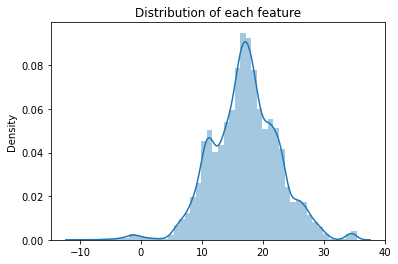

In [86]:
#check dataset distribution
sns.distplot(data).set(title='Distribution of each feature')

Why negative values ? Because data has already been log-normalized -> low intensities of a protein are negative.

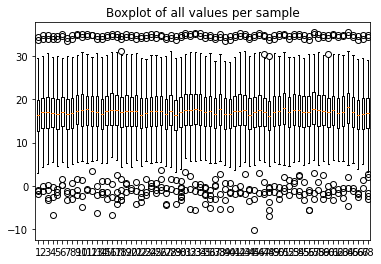

In [87]:
#plot each sample boxplot
plt.boxplot(data.transpose())
plt.title('Boxplot of all values per sample')
plt.show()

Distribution of dataset does not seem to be nicely normally distributed -> need to be normalized

## Normalization

In [88]:
#normally test function -> check if each column is normally distr
def norm_test(data):
    alpha = 1e-3
    k2, p = stats.normaltest(data)
    count=0
    for i in p:
        if i > alpha:  # null hypothesis: x comes from a normal distribution
            count+=1
    print('There are ',count,'normally distributed features out of',data.shape[1])
    
norm_test(data)

There are  289 normally distributed features out of 320


### Quantile Normalization

From other paper:\
One of the main goals performing normalization like Quantile normalization is to transform the raw data such that we can remove any unwanted variation due to technical artifacts and preserve the actual variation that we are interested in studying.

The quantile normalization (QN) procedure is simple: it involves first ranking the gene of each sample by magnitude, calculating the average value for genes occupying the same rank, and then substituting the values of all genes occupying that particular rank with this average value. The next step is to reorder the genes of each sample in their original order. This series of steps characterizes quantile normalization, and is the basic procedure underlying the various (sub)strategies

In [89]:
#QUANTILE NORMALIZATION
def quantile_normalize(df):
    #first rank each sample by magnitude
    df_sorted = pd.DataFrame(np.sort(df.values,axis=0),index=df.index,columns=df.columns)
    #compute average for genes in the same rank
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    #reorder the genes of each sample in their original order
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return df_qn

# compute quantile normalized data
df_qn=quantile_normalize(data)
data = df_qn
norm_test(data)

There are  320 normally distributed features out of 320


C:\Users\marti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of each feature after normalization')]

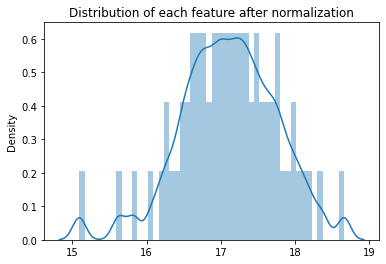

In [90]:
#check if data is better normally distributed
sns.distplot(data).set(title='Distribution of each feature after normalization')

## Split dataset

In [91]:
X = data

y_2 = df["TwoClass"]
X_train_2_20, X_test_2_20, y_train_2_20, y_test_2_20 = train_test_split(X, y_2, test_size = 0.20, random_state = 97,stratify=y_2)
X_train_2_40, X_test_2_40, y_train_2_40, y_test_2_40 = train_test_split(X, y_2, test_size = 0.40, random_state = 97,stratify=y_2)

y_3 = df["ThreeClass"]
X_train_3_20, X_test_3_20, y_train_3_20, y_test_3_20 = train_test_split(X, y_3, test_size = 0.20, random_state = 97,stratify=y_3)
X_train_3_40, X_test_3_40, y_train_3_40, y_test_3_40 = train_test_split(X, y_3, test_size = 0.40, random_state = 97,stratify=y_3)

### Is the data balanced ?

In [92]:
print("Binary: there are",len(y_2.loc[y_2==0]),"stable patients and",len(y_2.loc[y_2==1]),"decliner.")
print("Multi-class: there are",len(y_3.loc[y_3==0]),"slow decline, ",len(y_3.loc[y_3==1]),"fast decline and",len(y_3.loc[y_3==2]),"stable patients.")

Binary: there are 40 stable patients and 28 decliner.
Multi-class: there are 22 slow decline,  28 fast decline and 18 stable patients.


## Export dataset

In [93]:
#export to csv file
X_train_2_20.to_csv(r'dataset\otherD_X_train_2_20.csv')
X_test_2_20.to_csv(r'dataset\otherD_X_test_2_20.csv')
y_train_2_20.to_csv(r'dataset\otherD_y_train_2_20.csv')
y_test_2_20.to_csv(r'dataset\otherD_y_test_2_20.csv')

X_train_2_40.to_csv(r'dataset\otherD_X_train_2_40.csv')
X_test_2_40.to_csv(r'dataset\otherD_X_test_2_40.csv')
y_train_2_40.to_csv(r'dataset\otherD_y_train_2_40.csv')
y_test_2_40.to_csv(r'dataset\otherD_y_test_2_40.csv')

X_train_3_20.to_csv(r'dataset\otherD_X_train_3_20.csv')
X_test_3_20.to_csv(r'dataset\otherD_X_test_3_20.csv')
y_train_3_20.to_csv(r'dataset\otherD_y_train_3_20.csv')
y_test_3_20.to_csv(r'dataset\otherD_y_test_3_20.csv')

X_train_3_40.to_csv(r'dataset\otherD_X_train_3_40.csv')
X_test_3_40.to_csv(r'dataset\otherD_X_test_3_40.csv')
y_train_3_40.to_csv(r'dataset\otherD_y_train_3_40.csv')
y_test_3_40.to_csv(r'dataset\otherD_y_test_3_40.csv')